In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
results_df = pd.read_csv('Once_Upon_A_Thai_Reviews.csv')

In [ ]:
# Initialize VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Function to extract positive & negative words safely
def extract_sentiment_words(Review_Text):
    if not isinstance(Review_Text, str):
        return "", ""
    words = Review_Text.split()
    positive_words = [word for word in words if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word for word in words if sia.polarity_scores(word)['compound'] < 0]
    return " ".join(positive_words), " ".join(negative_words)

In [ ]:
# Apply function to extract sentiment words
results_df['positive_words'], results_df['negative_words'] = zip(*results_df['Review_Text'].map(extract_sentiment_words))

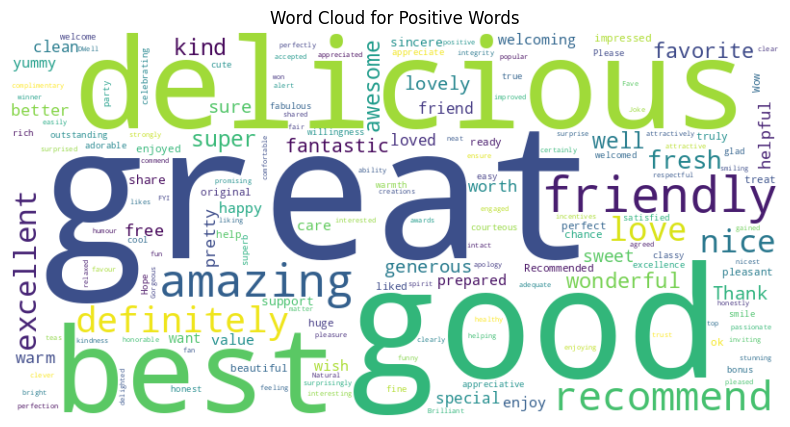

In [24]:
# Generate word clouds

# Positive Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(" ".join(results_df['positive_words']))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Words")
plt.show()


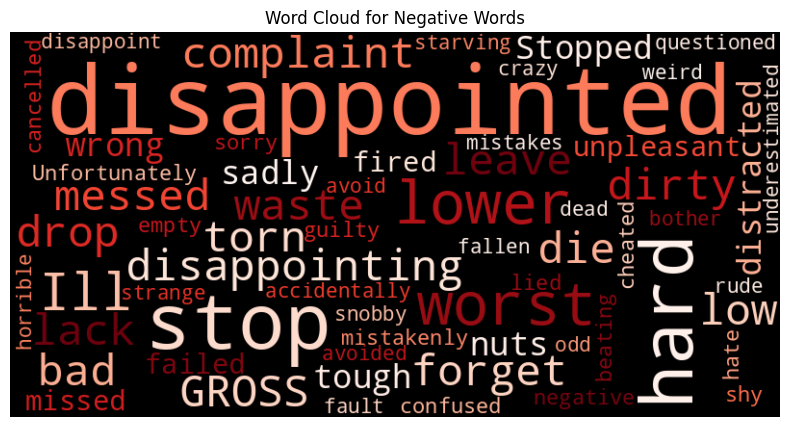

In [25]:
# Negative Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(" ".join(results_df['negative_words']))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Words")
plt.show()
